Sample shape: (569, 30)
Target shape: (569,)
Training set shape: (426, 30)
Testing set shape: (143, 30)
Accuracy: 0.95
[[44  6]
 [ 1 92]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



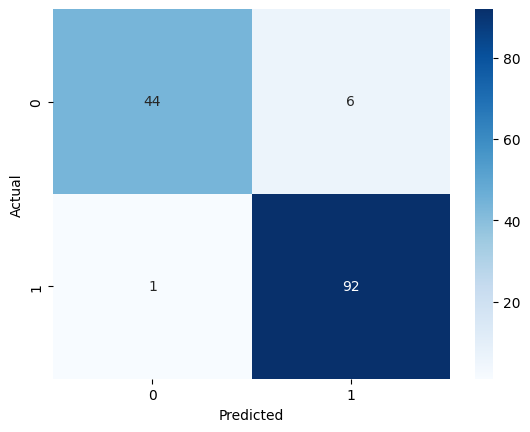

Mean accuracy: 0.94
Standard deviation: 0.03
          GaussianNB: mean accuracy=0.94 standard deviation=0.03
KNeighborsClassifier: mean accuracy=0.93 standard deviation=0.02
  LogisticRegression: mean accuracy=0.95 standard deviation=0.03
                 SVC: mean accuracy=0.92 standard deviation=0.04


In [3]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
print(f'Sample shape: {breast_cancer.data.shape}')
print(f'Target shape: {breast_cancer.target.shape}')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
predicted = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, predicted)
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print(f'Mean accuracy: {scores.mean():.2f}')
print(f'Standard deviation: {scores.std():.2f}')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2f} standard deviation={scores.std():.2f}')
